<center><u><h1>Assignment 8:- GRU AND Bidirectional LSTM RNN</center></u></h1>

![](https://c.tenor.com/tM6pDOQYblQAAAAC/welcome-back-awesome.gif)

##Gated Recurrent Unit (GRU)<br>
A gated recurrent unit (GRU) is part of a specific model of recurrent neural network that intends to use connections through a sequence of nodes to perform machine learning tasks associated with memory and clustering, for instance, in speech recognition. Gated recurrent units help to adjust neural network input weights to solve the vanishing gradient problem that is a common issue with recurrent neural networks.
![](https://production-media.paperswithcode.com/methods/780px-Gated_Recurrent_Unit_type_1.svg.png)

Refer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU


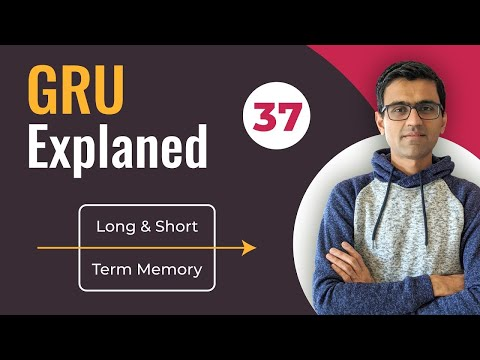

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('tOuXgORsXJ4', width=600, height=300)

###Architecture of Gated Recurrent Unit:<br>

Here we have a GRU cell which more or less similar to an LSTM cell or RNN cell.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-14-24-12.png)

At each timestamp t, it takes an input Xt and the hidden state Ht-1 from the previous timestamp t-1. Later it outputs a new hidden state Ht which again passed to the next timestamp.
###The first gate is the Reset gate and the other one is the update gate.

1. Reset Gate (Short term memory)
The Reset Gate is responsible for the short-term memory of the network i.e the hidden state (Ht). Here is the equation of the Reset gate.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-14-34-17.png)

The value of rt will range from 0 to 1 because of the sigmoid function. Here Ur and Wr are weight matrices for the reset gate.

2. We have an Update gate for long-term memory and the equation of the gate is shown below.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-15-13-00.png)

The only difference is of weight metrics i.e Uu and Wu.


Refer:https://keras.io/api/layers/recurrent_layers/gru/

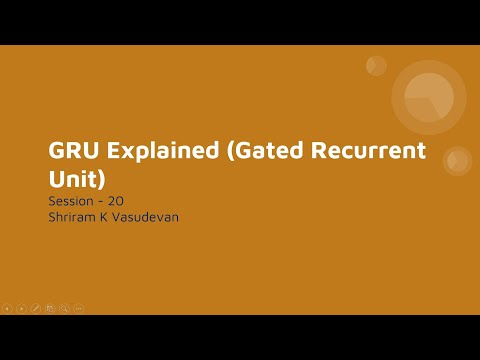

In [2]:
###Refer Video
YouTubeVideo('xLKSMaYp2oQ', width=600, height=300)

###Applications of GRU:<br>
Gated Recurrent Unit can be used to improve the memory capacity of a recurrent neural network as well as provide the ease of training a model. The hidden unit can also be used for settling the vanishing gradient problem in recurrent neural networks. <br>
It can be used in various applications, including speech signal modelling, machine translation, handwriting recognition, among others.

#Bidirectional LSTM RNN

To enable straight (past) and reverse traversal of input (future), Bidirectional RNNs, or BRNNs, are used. A BRNN is a combination of two RNNs - one RNN moves forward, beginning from the start of the data sequence, and the other, moves backward, beginning from the end of the data sequence. The network blocks in a BRNN can either be simple RNNs, GRUs, or LSTMs.<br>

when we are dealing with long sequences of data and the model is required to learn relationship between future and past word as well. we need to send data in that manner. To solve this problem bidirectional network was introduced.

Let’s take an example, assume we are having a sentence like<<br>
![](https://miro.medium.com/max/609/0*u1exzGPAtza4D50o.gif)

Here we can not predict the next word with normal RNN network but this can be solved in bidirectional RNN network. Also, RNN network can be LSTM or GRU.

Refer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

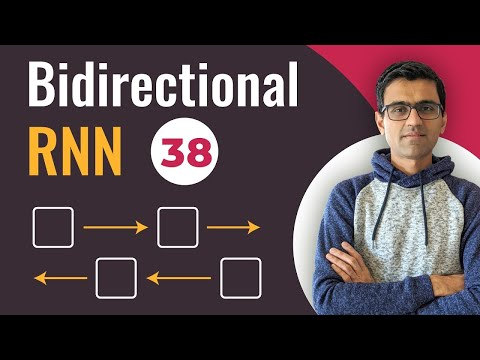

In [3]:
###Refer Video
YouTubeVideo('atYPhweJ7ao', width=600, height=300)

In bidirectional LSTM we give the input from both the directions from right to left and from left to right . Make a note this is not a backward propagation this is only the input which is given from both the side. So, the question is how the data is combined in output if we are having 2 inputs.

![](https://miro.medium.com/max/700/0*ZsTT3zzTNGF-6OsR.jpg)

Generally in normal LSTM network we take output directly as shown in first figure but in bidirectional LSTM network output of forward and backward layer at each stage is given to activation layer which is a neural network and output of this activation layer is considered. This output contains the information or relation of past and future word also.

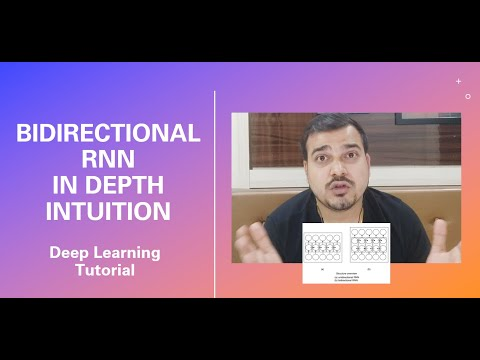

In [4]:
###Refer Video
YouTubeVideo('D-a6dwXzJ6s', width=600, height=300)

Applications
BRNN is useful for the following applications:
1. Handwriting Recognition
2. Speech Recognition
3. Dependency Parsing
4. Natural Language Processing Tasks.




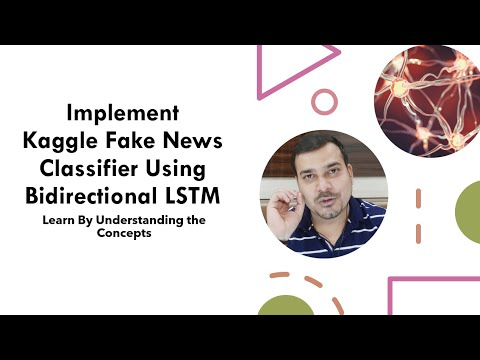

In [5]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('RpTmnRGJvRQ', width=600, height=300)

In [ ]:
onehot_repr = [one_hot(words,voc_size)for words in corpus]

In [ ]:
sent_length = 20
embedded_docs = paad_sequences(one hot_repr, paddibg = 'pre', maxlen = sent_length)

##Implementation of Bidirectional LSTMs on Tensorflow
BiDirectional LSTMs use two LSTMs to train on sequential input. The first LSTM is used on the input sequence as it is. The second LSTM is used on a reversed representation of the input sequence. It helps in supplementing additional context and makes our model fast.

Developing a Deep learning model to identify when an article might be fake news.Here we are using kaggle dataset.

we will import the necessary libraries.<br>
1. **Pandas** for data analysis,<br>
2. **Numpy** for calculating N-dimensional array,<br>
3. **Tensorflow** is used for multiple tasks but has a particular focus on the training and inference of deep neural networks and  Keras acts as an interface for the TensorFlow library.<br>
4. We’ll need word embeddings i.e **Embedding, Dense,LSTM layers and Bidirectional**.<br>
5. We’ll have to pad them with zeroes  by using  **pad_sequences** in order to make them of equal length.<br>
6. we will need **One-hot** encodes a text into a list of word indexes of size n.<br>
7. As we’ll stack all layers on top of each other with model.add, we need **Sequential** for constructing our model.<br>
8. It is time to split our data by using **train_test_split** from sklearn helps us to do that. It will split the data into training and testing data.
9. Importing **nltk, re, Stopwords,Poterstemmer** for nlp preprocessing.<br>
10. finally to check the **accuary** and **confusion matrix** of our model.




In [1]:
# Import above mentioned Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Embedding, Dense,LSTM, Bidirectional
import re
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anmul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


we will define our dataset and then we will see our dataset for overview.


You can download the dataset from here:<br>
https://drive.google.com/file/d/1OazFCF5yHlQPPXiwFA2DuUQ7OnKlUXQp/view?usp=sharing

In [2]:
#loading dataset using pandas
data = pd.read_csv('train (3).csv')

In [3]:
#partial view of dataset from top
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#dimension of dataset i.e shape of dataset
data.shape

(20800, 5)

In this dataset there are 20800 rows and 5 columns. There are some categorical and some numerical columns present.

Now its time to preprocess the data,
firstly we will observe the dataset, this means we have to see the data types of the columns. we will check the dataset information using the info() method.

In [5]:
#basic dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


You can see that the datatypes of each column, number of rows present with non-null values, there are many int float, and remaining are string datatype columns.

Now we will summarize the statistical part by using describe method.

In [6]:
#basic statistics symmary
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


Now we have to check for null values, for this, we use the pandas IsNull() method which will give True if the null value is present and False when there are no null values.

In [7]:
#checking for missing values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

We will drop the null values using the dropna method.

In [8]:
#dropping Null Values using dropna function
data = data.dropna()

In [9]:
data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

We have deleted all null values so that it can not affect the accuracy of the model . Now we will define X and Y as an independent and dependent variable

In [10]:
#Create a variable for independent feature and take axis=1
X = data.drop('label', axis = 1)
y = data['label']


In [11]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


The key part of NLP is text preprocessing which we perform on independent variable using NLTK library. We will use re library to remove punctuations then we will pass the data from stop words list and then do stemming on the data.
First,we will create a copy of independent feature to use them in preprocessing and then we will use  reset_index method to set index of list from ranging 0 to length of that list.After that we will using the re library for removing the punctutions in the dataset. As we have done the preprocessing in previous assignment same we have to do the prepocessing here in this cell.

In [12]:
copied = X.copy()

In [13]:
copied['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [14]:
copied.reset_index(inplace = True)

In [15]:
#create copy of independent variable 

#reset the index 
corpus = []
#create the porterstemmer object
stemmer = PorterStemmer()
for i in range(0,len(copied)):
    print(i)
    text = re.sub('[^a-zA-Z]',' ',copied['title'][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '. join(text)
    corpus.append(text)
#create a list to append preproccessed sentence

#By using Re Expression for preprocessing the data[DOne in previous assignment]





#here we can see that corpus contains the words after preprocessing done.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101


3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747


5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415


6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061


8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703


10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
1029

11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
1169

12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
1307

14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
1446

15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
1585

17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
1724

In [16]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

Now we will one hot encode the data as we have word list and we will get the index w.r.t vocab_size.One-hot encodes a text into a list of word indexes of size n.<br>
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [17]:
#create vocab size = 5000 
vocab_size = 5000 
from tensorflow.keras.preprocessing.text import one_hot
#by using one hot function 
onehot= [one_hot(words,vocab_size)for words in corpus]
#printing first 10 sentences.
onehot[0:10]

[[4428, 3508, 2957, 2347, 3875, 4038, 534, 4026, 4449, 1728],
 [946, 2977, 3590, 4480, 346, 3140, 1051],
 [1858, 3797, 234, 4985],
 [2583, 4221, 96, 2818, 1161, 3510],
 [4424, 346, 3429, 4984, 4161, 845, 346, 3476, 1275, 1402],
 [4198,
  1952,
  296,
  4414,
  4526,
  4519,
  4192,
  1181,
  3164,
  970,
  3259,
  1663,
  1431,
  3931,
  1051],
 [822, 2968, 2416, 3335, 4736, 842, 2063, 4623, 2170, 2718, 2446],
 [4380, 477, 162, 3498, 4706, 763, 4519, 4762, 2170, 2718, 2446],
 [4774, 4353, 1279, 2402, 2128, 2467, 2752, 888, 4519, 3169],
 [2890, 506, 2848, 4705, 3455, 524, 2037, 510]]

Next step is padding, as the sentences we have are different in size so we have to do padding to make them equal in length. We can use pre or post padding.
Here we are pre padding and setting length to 30.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

In [18]:
#create length set to 30
sent_length=30
#Creating pad sequences and passing parameters are onehot,length and padding=pre
trained=tf.keras.preprocessing.sequence.pad_sequences(onehot,padding='pre',maxlen=sent_length)
#printing first 10 values
print(trained[0:10])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 4428 3508 2957 2347 3875 4038  534 4026
  4449 1728]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  946 2977 3590 4480  346
  3140 1051]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 1858 3797
   234 4985]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 2583 4221   96 2818
  1161 3510]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 4424  346 3429 4984 4161  845  346 3476
  1275 1402]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 4198 1952  296 4414 4526 4519 4192 1181 3164  970 3259 1663 1431
  3931 1051]
 [   0    0    0    0    0    0    0    0    0    0    0  

From above all output we can see that how our sentences are preprocessed for the LSTM input. Now we can implement model to train on our data.
We will adding all the hidden layers in the cell.
We can then define the  model. we can initialize the model variable with Sequential().
The first layer is an Embedding layer, which learns a word embedding that in our case has a dimensionality of 40.
This is followed by an Bidirectional LSTM layer providing the recurrent segment, and a Dense layer that has one output through Sigmoid a number between 0 and 1.

In [19]:
#setting embedding_vector_features=40 
embedding_vector_features=40

## Define the Keras model and intialize with sequential()
model=Sequential()
#intialize first layer for embedding with vocab_size,embedding_vector_features and length
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
#intialize another layer with LSTM for 100
model.add(Bidirectional(LSTM(100)))
#adding dense layer with 1 output and having activation function of sigmoid
model.add(Dense(1,activation='sigmoid'))

The model can then be compiled. We do so by specifying the optimizer, the loss function, and the metrics that we had specified before.

In [20]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

This is also a good place to generate a summary of what the model looks like.

In [22]:
#printing the summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


Making into pad sequences sentences into numpy array to pass them in training same goes with denpendant feature i.e y

In [23]:
#converting into numpy array and store them in X for pad sequence sentences
import numpy as np
X=np.array(trained)
y=np.array(y)
#converting into numpy array and store them in Y for dependant Feature i.e y 
X.shape,y.shape

((18285, 30), (18285,))

Split the data into training and testing dataset by using train_test_split from sklearn. After spliting, The model is ready for training :).<br>
Training the model,we can instruct TensorFlow to start the training process.

In [34]:
#spliting the data using train_test_split from sklearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Train the model X train, Y train, batch size=64 , epochs=5 ,and validation data is X test and Y test.
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
192/192 [==============================] - 7s 36ms/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.2530 - val_accuracy: 0.9354
Epoch 2/5
192/192 [==============================] - 7s 37ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.3192 - val_accuracy: 0.9286
Epoch 3/5
192/192 [==============================] - 7s 37ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.3101 - val_accuracy: 0.9281
Epoch 4/5
192/192 [==============================] - 7s 37ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.3687 - val_accuracy: 0.9302
Epoch 5/5
192/192 [==============================] - 7s 37ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.3870 - val_accuracy: 0.9223


We can test our model finally on testing data and can check the confusion metrix.

In [42]:
score, acc = model.evaluate(X_test, y_test)

189/189 [==============================] - 1s 5ms/step - loss: 0.3870 - accuracy: 0.9223


In [43]:
print('Test loss:', score)
print('Test accuracy:', acc)

Test loss: 0.3870278298854828
Test accuracy: 0.9222866892814636


In [37]:
y_pred1

array([[0.9962403 ],
       [0.00477372],
       [0.05912136],
       ...,
       [0.9743455 ],
       [0.02218872],
       [0.9975743 ]], dtype=float32)

In [38]:
X_test

array([[   0,    0,    0, ..., 1706, 3662, 4894],
       [   0,    0,    0, ..., 2170, 2718, 2446],
       [   0,    0,    0, ..., 2170, 2718, 2446],
       ...,
       [   0,    0,    0, ..., 2170, 2718, 2446],
       [   0,    0,    0, ...,    0,    0, 4519],
       [   0,    0,    0, ..., 4444, 3926, 1556]])

![](https://c.tenor.com/0wGsnKiXsmsAAAAM/hurray-happy.gif)

Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.